# Credit Risk Classification Data Science Project

This kernel consists of three objectives:

1. Perform data preprocessing consist of creating assumptions about data shape, fixing Incorrect data types, filling, Missing values, and convert Categorical variables then do exploratory analysis to extract meaningful insight from the data and identify the best features to be used for modeling.

2. Train, test, and refine various classification models to best predict which passengers survived. The predictive algorithms to be trained are:

    a. Logistic Regression
    
    b. K-Nearest Neighbors (KNN)
    
    c. Decision Tree
    
    d. Random Forest

3. Apply the best performing model to the test set

## Data Pre-Processing

The first step in the machine learning pipeline is to clean and transform the training data into a useable format for analysis and modeling.

As such, data pre-processing addresses:

1. Assumptions about data shape
2. Incorrect data types
3. Missing values
4. Categorical variables

### Importing relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.linear_model import LinearRegression
import math
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
from scipy.sparse import hstack
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
from sklearn.model_selection import learning_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import learning_curve, cross_val_score

In [2]:
data = pd.read_csv('../../credit-risk-classifier/data/raw/loan_data_2007_2014.csv')

/var/folders/zc/k6yw_d051m3ff3ddt90f9yjw0000gn/T/ipykernel_90432/3453792268.py:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('../../credit-risk-classifier/data/raw/loan_data_2007_2014.csv')


## Data Cleaning and Exploration

### Data exploration

In [3]:
data.shape

(466285, 75)

In [4]:
data.columns

Index(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url',
       'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'verificatio

In [5]:
data.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
for column in data: 
    print('Column: {} - Unique Values: {}'.format(column, data[column].unique()))

Column: Unnamed: 0 - Unique Values: [     0      1      2 ... 466282 466283 466284]
Column: id - Unique Values: [1077501 1077430 1077175 ... 9584776 9604874 9199665]
Column: member_id - Unique Values: [ 1296599  1314167  1313524 ... 11436914 11457002 11061576]
Column: loan_amnt - Unique Values: [ 5000  2500  2400 ... 33675 27775 33175]
Column: funded_amnt - Unique Values: [ 5000  2500  2400 ... 27775 33175 31725]
Column: funded_amnt_inv - Unique Values: [ 4975.  2500.  2400. ... 30425. 33125. 33625.]
Column: term - Unique Values: [' 36 months' ' 60 months']
Column: int_rate - Unique Values: [10.65 15.27 15.96 13.49 12.69  7.9  18.64 21.28 14.65  9.91 16.29  6.03
 11.71 12.42 14.27 16.77  7.51  8.9  18.25  6.62 19.91 17.27 17.58 21.67
 19.42 22.06 20.89 20.3  23.91 19.03 23.52 23.13 22.74 22.35 24.11  6.
 22.11  7.49 11.99  5.99 10.99  9.99 18.79 11.49  8.49 15.99 16.49  6.99
 12.99 15.23 14.79  5.42 10.59 17.49 15.62 21.36 19.29 13.99 18.39 16.89
 17.99 20.62 20.99 22.85 19.69 20.25 23

Column: revol_util - Unique Values: [ 83.7   9.4  98.5 ... 111.3 113.  141.8]
Column: total_acc - Unique Values: [  9.   4.  10.  37.  38.  12.  11.  13.   3.  23.  34.  29.  28.  42.
  14.  22.  21.  17.   7.  31.  44.  26.  16.   6.  18.  27.  24.  25.
  40.  35.   8.  20.  15.  19.  36.  51.  32.  30.  33.  46.   5.  61.
  56.  50.  41.  39.  79.  62.  43.  47.  53.  45.  60.  55.  52.  58.
  54.  57.  49.  63.  48.  59.  77.  87.  75.  72.  64.  67.  78.  76.
  74.  66.  81.  90.  80.  71.  69.  73.  70.  68.  65.   2.   1.  nan
 105.  83.  84.  98.  88.  82.  91.  99.  86.  93.  92.  96. 101. 150.
  95.  85. 156.  89. 106.  97. 119. 124. 100.  94. 121. 102. 117. 116.
 118.]
Column: initial_list_status - Unique Values: ['f' 'w']
Column: out_prncp - Unique Values: [    0.     766.9   1889.15 ... 12574.   14428.31  3984.38]
Column: out_prncp_inv - Unique Values: [    0.     766.9   1889.15 ... 12574.   14428.31  3974.41]
Column: total_pymnt - Unique Values: [ 5861.071414  1008.71    

After loading the dataset, I examine its shape, the column included, and unique value inside each column to get a better sense of the data and the information it contains.

#### Summary statistic for numerical features

In [7]:
numerical_data = data.select_dtypes(include=[np.number])
numerical_data.describe()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,466285.000000,4.662850e+05,4.662850e+05,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,4.662810e+05,466285.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,3.960090e+05,0.0,0.0,0.0
mean,233142.000000,1.307973e+07,1.459766e+07,14317.277577,14291.801044,14222.329888,13.829236,432.061201,7.327738e+04,17.218758,...,NaN,NaN,NaN,NaN,NaN,NaN,3.037909e+04,NaN,NaN,NaN
std,134605.029472,1.089371e+07,1.168237e+07,8286.509164,8274.371300,8297.637788,4.357587,243.485550,5.496357e+04,7.851121,...,NaN,NaN,NaN,NaN,NaN,NaN,3.724713e+04,NaN,NaN,NaN
min,0.000000,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN
25%,116571.000000,3.639987e+06,4.379705e+06,8000.000000,8000.000000,8000.000000,10.990000,256.690000,4.500000e+04,11.360000,...,NaN,NaN,NaN,NaN,NaN,NaN,1.350000e+04,NaN,NaN,NaN
50%,233142.000000,1.010790e+07,1.194108e+07,12000.000000,12000.000000,12000.000000,13.660000,379.890000,6.300000e+04,16.870000,...,NaN,NaN,NaN,NaN,NaN,NaN,2.280000e+04,NaN,NaN,NaN
75%,349713.000000,2.073121e+07,2.300154e+07,20000.000000,20000.000000,19950.000000,16.490000,566.580000,8.896000e+04,22.780000,...,NaN,NaN,NaN,NaN,NaN,NaN,3.790000e+04,NaN,NaN,NaN
max,466284.000000,3.809811e+07,4.086083e+07,35000.000000,35000.000000,35000.000000,26.060000,1409.990000,7.500000e+06,39.990000,...,NaN,NaN,NaN,NaN,NaN,NaN,9.999999e+06,NaN,NaN,NaN


#### Summary statistic for categorical data

In [8]:
categorical_data = data.select_dtypes(include=[object])
categorical_data.describe().T

,count,unique,top,freq
term,466285,2,36 months,337953
grade,466285,7,B,136929
sub_grade,466285,35,B3,31686
emp_title,438697,205475,Teacher,5399
emp_length,445277,11,10+ years,150049
home_ownership,466285,6,MORTGAGE,235875
verification_status,466285,3,Verified,168055
issue_d,466285,91,Oct-14,38782
loan_status,466285,9,Current,224226
pymnt_plan,466285,2,n,466276


### Data Cleaning

In [9]:
data=data.drop(['inq_fi', 'total_cu_tl', 'inq_last_12m','open_acc_6m', 'open_il_6m', 'open_il_12m',
       'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util',
       'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util','annual_inc_joint', 'dti_joint',
       'verification_status_joint','Unnamed: 0', 'id', 'member_id','desc','pymnt_plan','zip_code','url','delinq_2yrs','last_pymnt_d','next_pymnt_d','last_credit_pull_d','earliest_cr_line','issue_d','emp_title','title','addr_state','sub_grade','home_ownership'], axis=1)

Remove the features that obviously won’t add any value to the model.

#### Null handiling

In [10]:
data.isna().sum()

loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
installment                         0
grade                               0
emp_length                      21008
annual_inc                          4
verification_status                 0
loan_status                         0
purpose                             0
dti                                 0
inq_last_6mths                     29
mths_since_last_delinq         250351
mths_since_last_record         403647
open_acc                           29
pub_rec                            29
revol_bal                           0
revol_util                        340
total_acc                          29
initial_list_status                 0
out_prncp                           0
out_prncp_inv                       0
total_pymnt                         0
total_pymnt_inv                     0
total_rec_pr

From the entry totals above, there appears to be missing data. 

In [11]:
data = data.dropna(subset=['emp_length','annual_inc', 'inq_last_6mths','pub_rec', 'revol_bal', 'revol_util', 'total_acc','last_pymnt_amnt',
       'collections_12_mths_ex_med','acc_now_delinq','tot_coll_amt','total_rev_hi_lim','tot_cur_bal']) 

This code drops rows from the DataFrame data where any of the specified columns ('emp_length', 'annual_inc', 'inq_last_6mths', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'last_pymnt_amnt', 'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt', 'total_rev_hi_lim', 'tot_cur_bal') have missing values (NaN).

#### Data Imputation

In [12]:
data['mths_since_last_delinq'] = data['mths_since_last_delinq'].fillna(data['mths_since_last_delinq'].mean())

In [13]:
data['mths_since_last_record'] = data['mths_since_last_record'].fillna(data['mths_since_last_record'].mean())

In [14]:
data['mths_since_last_major_derog'] = data['mths_since_last_major_derog'].fillna(data['mths_since_last_major_derog'].mean())

Imputing null value with the mean value of the feature

In [15]:
data['term'] = data['term'].str.replace('months', '')

In [16]:
data['term'] = pd.to_numeric(data['term'])

Replaces the substring 'months' with an empty string '' in each element of the 'term' column and changing the data types from string to numeric types

In [17]:
data['initial_list_status'] = data['initial_list_status'].str.replace('w', 'whole_loan')

In [18]:
data['initial_list_status'] = data['initial_list_status'].str.replace('f', 'fractional_loan')

replaces the substring 'w' and 'n' so it gets better to understand

#### Data scaling and normalization

In [19]:
from sklearn import preprocessing

# Select numerical features for normalization
numeric_features = data.select_dtypes(include=['int', 'float']).columns

# Normalization
scaler = StandardScaler()
data[numeric_features] = scaler.fit_transform(data[numeric_features])


Performs normalization on numerical features in the DataFrame data using StandardScaler.

## Explainatory Data Analysis

The main objectives for this part of the notebook are:

- Explore the clean dataset by performing univariate analysis
- Investiage the relationships between your features and your target by perofrming bivariate and multivariate analyses
- Extract relevant insights to share with business stakeholders

#### Question to be answered!
1. What is the distribution of the grades as the dependent variable
1. Is there any correlation between loan amount and credit risk?
2. What is the relationship between interest rate and credit risk?
3. Does the length of employment affect credit risk?
4. Are there any patterns in the types of loans (purpose) and credit risk?
5. What is the relationship between credit utilization (revol_util) and credit risk?

#### 1. Distribution of the grades as the dependent variable

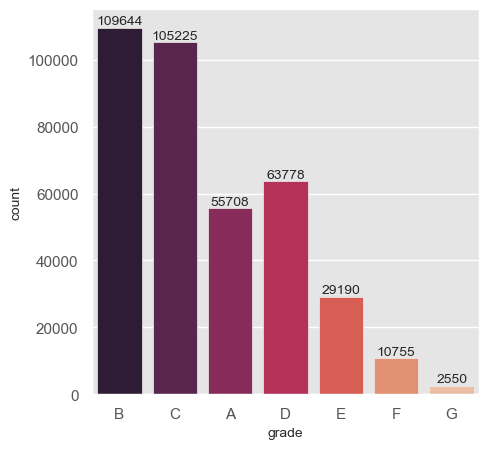

In [20]:
plt.style.use("ggplot")
plt.figure(figsize=(5,5))
ax = sns.countplot(x = data["grade"],palette="rocket")
ax.bar_label(ax.containers[0])
plt.show()

Barplot above shows that most of the population of the data were classified as grade B and that the target variable imbalanced is exist, the issue will be resolved.

#### 2. Correlation between loan amount and credit risk

<Figure size 800x600 with 0 Axes>

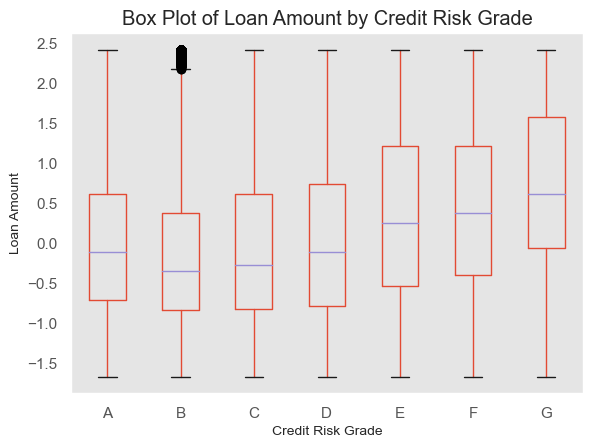

Median Loan Amounts by Credit Risk Grade:
  Credit Risk Grade  Median Loan Amount
0                 A           -0.106887
1                 B           -0.347440
2                 C           -0.278281
3                 D           -0.106887
4                 E            0.253944
5                 F            0.374220
6                 G            0.614774


In [21]:
# Create the box plot
plt.figure(figsize=(8, 6))
data.boxplot(column='loan_amnt', by='grade', grid=False)
plt.title('Box Plot of Loan Amount by Credit Risk Grade')
plt.xlabel('Credit Risk Grade')
plt.ylabel('Loan Amount')
plt.suptitle('')  # Remove default title
plt.show()

# Calculate median loan amount for each grade
median_loan_amounts = data.groupby('grade')['loan_amnt'].median().reset_index()
median_loan_amounts.columns = ['Credit Risk Grade', 'Median Loan Amount']

# Print the table
print("Median Loan Amounts by Credit Risk Grade:")
print(median_loan_amounts)

Based on the box plot above, we can conclude that there appears to be a correlation between loan amount and credit risk. 

Borrowers with higher credit risk, as indicated by lower credit grades, tend to borrow larger amounts of loans. However, it's important to note that correlation does not necessarily imply causation

#### 3. Relationship between interest rate and credit risk

<Figure size 800x600 with 0 Axes>

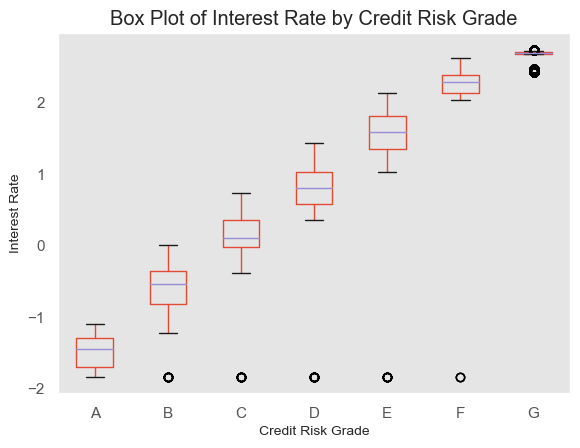

Median Interest Rate by Credit Risk Grade:
  Credit Risk Grade  Interest Rate
0                 A      -1.448612
1                 B      -0.540919
2                 C       0.102221
3                 D       0.804657
4                 E       1.584634
5                 F       2.289351
6                 G       2.688463


In [22]:
# Create the box plot
plt.figure(figsize=(8, 6))
data.boxplot(column='int_rate', by='grade', grid=False)
plt.title('Box Plot of Interest Rate by Credit Risk Grade')
plt.xlabel('Credit Risk Grade')
plt.ylabel('Interest Rate')
plt.suptitle('') 
plt.show()

# Calculate median loan amount for each grade
median_loan_amounts = data.groupby('grade')['int_rate'].median().reset_index()
median_loan_amounts.columns = ['Credit Risk Grade', 'Interest Rate']

# Print the table
print("Median Interest Rate by Credit Risk Grade:")
print(median_loan_amounts)

Based on the box plot above, we can conclude that there's to be a correlation between Interest rate and credit risk. 

Borrowers with higher credit risk, as indicated by lower credit grades, tend to borrow with higher interest rate, while borrowers with lower credit risk, indicated by higher credit grades, tend to borrow with smaller interest rate. However, it's important to note that correlation does not necessarily imply causation

#### 4. Length of employment

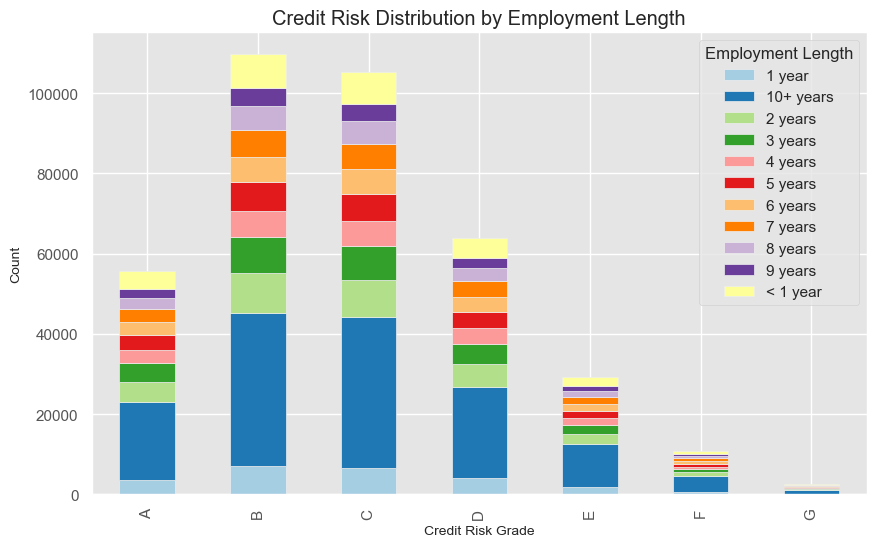

Count of Employment Length Categories within Each Credit Risk Grade:
emp_length  1 year  10+ years  2 years  3 years  4 years  5 years  6 years  \
grade                                                                        
A             3696      19242     5173     4609     3360     3727     3157   
B             7095      38109    10079     8849     6411     7272     6356   
C             6584      37626     9310     8335     6153     6900     6206   
D             4096      22543     5772     5129     3821     4179     3636   
E             1807      10635     2537     2255     1680     1908     1606   
F              636       3923      928      805      609      709      664   
G              160        990      221      180      127      144      135   

emp_length  7 years  8 years  9 years  < 1 year  
grade                                            
A              3240     2779     2208      4517  
B              6693     5870     4576      8334  
C              6294     5522

In [23]:
# Filter data for the specified employment length categories
employment_categories = ['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years', '4 years', '5 years', '6 years', '2 years', '7 years']
filtered_data = data[data['emp_length'].isin(employment_categories)]

# Group data by 'grade' and 'emp_length', then count the occurrences
grouped_data = filtered_data.groupby(['grade', 'emp_length']).size().unstack(fill_value=0)

colors = sns.color_palette("Paired", len(grouped_data.columns))

# Plot stacked bar chart
grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6),color=colors)

# Customize plot
plt.xlabel('Credit Risk Grade')
plt.ylabel('Count')
plt.title('Credit Risk Distribution by Employment Length')
plt.legend(title='Employment Length')

# Show plot and table
plt.show()

# Print the table
print("Count of Employment Length Categories within Each Credit Risk Grade:")
print(grouped_data)

Based on the plot and the table above, it shows the table consistently shows higher counts of certain credit risk grades across various employment length categories. For instance, credit risk grade B tends to have the highest counts across different employment lengths, followed by grades C and D.

One plausible explanation for this consistency could be that individuals with longer employment lengths tend to demonstrate greater financial stability and reliability, leading to lower credit risk. On the other hand, those with shorter employment lengths might be perceived as less stable, potentially resulting in higher credit risk.

#### 5. Patterns in the types of loans (purpose) and credit risk

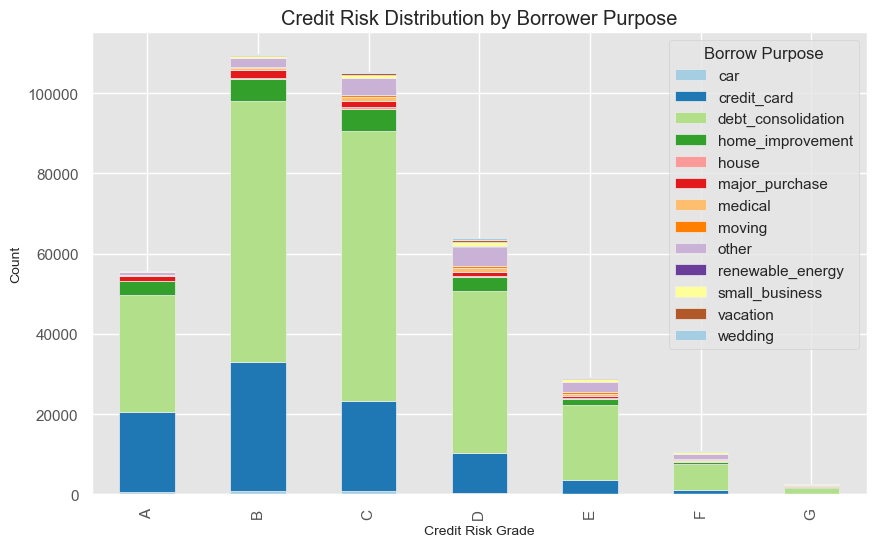

Count of Borrower Purpose within Each Credit Risk Grade:
purpose  car  credit_card  debt_consolidation  home_improvement  house  \
grade                                                                    
A        680        19861               29130              3395    161   
B        920        31992               65103              5573    279   
C        780        22521               67234              5621    310   
D        431         9831               40499              3303    296   
E        151         3331               18692              1649    233   
F         68          902                6493               581    157   
G         15          166                1450               159     65   

purpose  major_purchase  medical  moving  other  renewable_energy  \
grade                                                               
A                  1244      185      38    709                 9   
B                  1773      577     210   2392                18   


In [24]:
# Filter data for the specified employment length categories
purpose = data["purpose"]
filtered_data = data[data['purpose'].isin(purpose)]

# Group data by 'grade' and 'emp_length', then count the occurrences
grouped_data = filtered_data.groupby(['grade', 'purpose']).size().unstack(fill_value=0)
colors = sns.color_palette("Paired", len(grouped_data.columns))

# Plot stacked bar chart
grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6),color=colors)

# Customize plot
plt.xlabel('Credit Risk Grade')
plt.ylabel('Count')
plt.title('Credit Risk Distribution by Borrower Purpose')
plt.legend(title='Borrow Purpose')

# Show plot and table
plt.show()

# Print the table
print("Count of Borrower Purpose within Each Credit Risk Grade:")
print(grouped_data)

Based on the plot and the table above, it shows a pattern where the table consistently shows higher counts of certain purpose across various credit risk grades. For example, debt consolidation tends to have the highest counts across different grade, followed by credit card and home improvement.

This shows that most of the borrowers, no matter the grade, tends to borrow money to do debt consolidation as individuals often seek to consolidate their debts to manage them more effectively, this suggest a common financial need among borrowers.

#### 6. Relationship between credit utilization (revol_util) and credit risk

<Figure size 800x600 with 0 Axes>

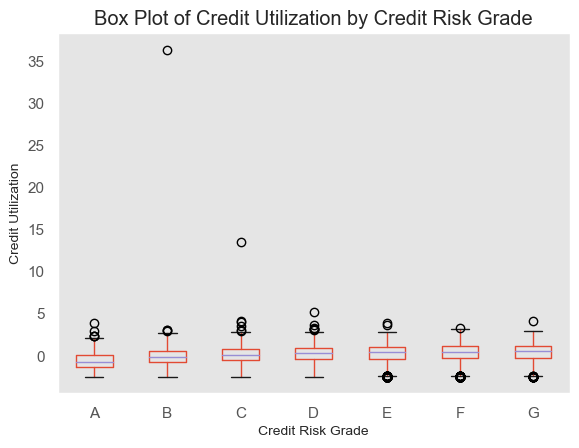

Median Credit Utilization by Credit Risk Grade:
  Credit Risk Grade  Credit Utilization
0                 A           -0.658379
1                 B           -0.069911
2                 C            0.174194
3                 D            0.331119
4                 E            0.453172
5                 F            0.522916
6                 G            0.586122


In [25]:
# Create the box plot
plt.figure(figsize=(8, 6))
data.boxplot(column='revol_util', by='grade', grid=False)
plt.title('Box Plot of Credit Utilization by Credit Risk Grade')
plt.xlabel('Credit Risk Grade')
plt.ylabel('Credit Utilization')
plt.suptitle('') 
plt.show()

# Calculate median loan amount for each grade
median_loan_amounts = data.groupby('grade')['revol_util'].median().reset_index()
median_loan_amounts.columns = ['Credit Risk Grade', 'Credit Utilization']

# Print the table
print("Median Credit Utilization by Credit Risk Grade:")
print(median_loan_amounts)


The boxplot and table above shows that borrower with credit risk grade G has the highest credit utilization while the borrower with grade A has the lowest credit utilization.

This mean that the higher individual using their available credit, the lower their credit risk grade are. And the lower individual utilized their credit, the higher their grade are.

## Feature Enginering

The main objectives for this part of notebook are:

- Develop a set of features that have a potential to improve your model's performance
- Investiage the relationships between your new features and your target


Now that we've explored the data, it is time to get these features 'model ready'. 

In [26]:
y = data['grade']
x = data.drop('grade', axis=1)

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, train_size = .75) #puts 75 percent of the data into a training set and the remaining 25 percent into a testing set.
print('Shape of x_train and y_train: ',x_train.shape, y_train.shape)
print('Shape of x_test and y_test: ',x_test.shape, y_test.shape)

Shape of x_train and y_train:  (282637, 39) (282637,)
Shape of x_test and y_test:  (94213, 39) (94213,)


To avoid data leakage, first we need to split the data to train and test set.

In [28]:
subsample_size = 0.5

In [29]:
x_train = x_train.sample(frac=subsample_size, random_state=42)
y_train = y_train.loc[x_train.index]

print('Shape of subsampled x_train: ', x_train.shape)
print('Shape of subsampled y_train: ', y_train.shape)

Shape of subsampled x_train:  (141318, 39)
Shape of subsampled y_train:  (141318,)


Perform subsampling on the training data set to make the modeling more efficient

In [30]:
x_train_dum = pd.get_dummies(x_train[['emp_length','verification_status','loan_status','purpose','initial_list_status','application_type']])

In [31]:
x_test_dum = pd.get_dummies(x_test[['emp_length','verification_status','loan_status','purpose','initial_list_status','application_type']])

After splitting the data, categorial features will need to be converted into 'dummy variables', otherwise a machine learning algorithm will not be able to take in those features as inputs.

In [32]:
print('Shape of x_train and y_train: ',x_train.shape, y_train.shape)
print('Shape of x_test and y_test: ',x_test.shape, y_test.shape)

Shape of x_train and y_train:  (141318, 39) (141318,)
Shape of x_test and y_test:  (94213, 39) (94213,)


In [33]:
x_train = pd.concat([x_train, x_train_dum], axis = 1)

In [34]:
x_test = pd.concat([x_test, x_test_dum], axis = 1)

Concatenate the data set and the dummy features that just got generated

In [37]:
x_train.drop(['emp_length','verification_status','loan_status','purpose','initial_list_status','application_type'], axis = 1, inplace = True)

In [38]:
x_test.drop(['emp_length','verification_status','loan_status','purpose','initial_list_status','application_type'], axis = 1, inplace = True)

Dropping the column that just got dummied and concatenated

[2.13903027e-02 2.13709144e-02 2.16339834e-02 2.71686315e-02
 3.51014204e-01 3.72706799e-02 1.71259627e-02 1.79180235e-02
 1.57755181e-02 1.44602976e-02 7.26043497e-03 1.57529440e-02
 7.36908258e-03 1.61572693e-02 2.39159774e-02 1.63935190e-02
 1.50693968e-02 1.49202562e-02 2.30914414e-02 2.30972652e-02
 3.01848682e-02 5.50668014e-02 2.09080649e-03 1.83904014e-03
 1.73308734e-03 2.39517085e-02 1.37638906e-03 1.11161912e-02
 0.00000000e+00 7.64019536e-04 7.66983240e-03 1.77357722e-02
 1.92769266e-02 4.72586423e-03 9.04582101e-03 5.66757162e-03
 5.30102129e-03 4.45391754e-03 4.75087651e-03 4.44202678e-03
 4.59247692e-03 4.11646569e-03 3.56942547e-03 5.12213627e-03
 5.49435355e-03 4.73929634e-03 5.01669805e-03 2.75498224e-03
 4.24147304e-03 2.79473566e-04 2.73580243e-03 7.49935239e-04
 3.22036399e-04 1.25505945e-03 8.18785005e-04 6.28459340e-03
 4.79797244e-03 2.67555059e-03 5.76792062e-04 1.40624426e-03
 1.01079623e-03 8.14410264e-04 3.54887010e-03 1.21481587e-04
 1.32234155e-03 5.810434

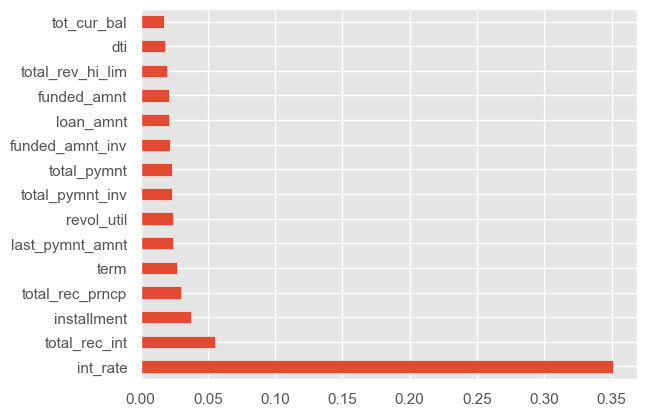

In [39]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(x_train,y_train)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x_train.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

Perform feature importance to see which features to evaluate the relevance or importance of each feature (or input variable) in predicting the target variable. It helps to identify which features have the most significant influence on the model's predictions.

In [40]:
columns_to_keep = ['int_rate', 'total_rec_int', 'installment', 'total_rec_prncp', 
                   'term', 'last_pymnt_amnt', 'revol_util', 'total_pymnt', 
                   'total_pymnt_inv', 'loan_amnt', 'funded_amnt', 'total_rev_hi_lim', 
                   'dti', 'tot_cur_bal']

# List of columns to drop
columns_to_drop = [col for col in x_train.columns if col not in columns_to_keep]
columns_to_drop2 = [col for col in x_test.columns if col not in columns_to_keep]

# Drop columns
x_train.drop(columns=columns_to_drop, inplace=True)
x_test.drop(columns=columns_to_drop2, inplace=True)

Dropping column that has less relevant to predicting target variable and kept the top 15 feature, this also help simplify the model and avoid overfitting and create more efficiency.

In [41]:
# Assuming 'data' is your DataFrame containing the 'grade' column
grade_distribution = data['grade'].value_counts()

# Print the distribution of grades
print("Grade Distribution:")
print(grade_distribution)

Grade Distribution:
B    109644
C    105225
D     63778
A     55708
E     29190
F     10755
G      2550
Name: grade, dtype: int64


Checking the target variable distribution and found that there's a imbalanced data distribution

In [42]:
# Import the necessary libraries
from imblearn.over_sampling import SMOTE

# Creating an instance of SMOTE
smote = SMOTE()

# Balancing the data
x_train, y_train = smote.fit_resample(x_train, y_train)

Implement oversampling to handled imbalance target variable using SMOTE library

In [44]:
grade_distribution = y_train.value_counts()

# Print the distribution of grades
print("Grade Distribution:")
print(grade_distribution)

Grade Distribution:
B    41131
C    41131
A    41131
D    41131
F    41131
E    41131
G    41131
Name: grade, dtype: int64


## Modelling

The main objectives for this part of the notebook are:

- To develop a model that will satisfiy our modelling objective
- To properly evaluate the developed model
- To have a trained model ready for deployment

In [45]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

decisionTreeScore = metrics.accuracy_score(y_test, y_pred)

In [46]:
# Model Accuracy, how often is the classifier correct?
# Print the parameters used in the Decision Tree classifier
print("Parameters used in the Decision Tree classifier:")
print(clf.get_params())
print("Accuracy:",decisionTreeScore)

Parameters used in the Decision Tree classifier:
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}
Accuracy: 0.9734643838960653


In [47]:
# Fit 
# Import model
from sklearn.linear_model import LogisticRegression

# Create instance of model
lreg = LogisticRegression()

# Pass training data into model
lreg.fit(x_train, y_train)

/Users/naufal/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [48]:
# Predict
y_pred_lreg = lreg.predict(x_test)

In [49]:
# Score It
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,f1_score, precision_score, recall_score

# Confusion Matrix
print('Logistic Regression')
print('\n')
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred_lreg))
print('--'*40)

# Classification Report
print('Classification Report')
print(classification_report(y_test,y_pred_lreg))

# Accuracy
print('--'*40)
logreg_accuracy = round(accuracy_score(y_test, y_pred_lreg) * 100)
print('Accuracy', logreg_accuracy,'%')

logisticRegressionScore = logreg_accuracy/100

Logistic Regression


Confusion Matrix
[[13720   175     0     0     0     0     0]
 [  443 24740  2320     0     0     0     0]
 [    2  1744 22195  2313     0     0     0]
 [    5     0  1639 12824  1415     0     0]
 [    4     0     0   663  6299   379     0]
 [    1     0     0     0    20  2376   326]
 [    0     0     0     0     0    51   559]]
--------------------------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           A       0.97      0.99      0.98     13895
           B       0.93      0.90      0.91     27503
           C       0.85      0.85      0.85     26254
           D       0.81      0.81      0.81     15883
           E       0.81      0.86      0.84      7345
           F       0.85      0.87      0.86      2723
           G       0.63      0.92      0.75       610

    accuracy                           0.88     94213
   macro avg       0.84      0.88      0.86     94213


In [50]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [51]:
y_pred = rf.predict(x_test)

In [52]:
accuracy1 = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy1)
randomForestScore = accuracy1

Accuracy: 0.9527135321027883


In [53]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [54]:
y_pred = knn.predict(x_test)

In [55]:
accuracy2 = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy2)
KNeighborsScore = accuracy2

Accuracy: 0.7739802362731258


In [56]:
df_score = pd.DataFrame({
    'KNeighbors Classifier': KNeighborsScore,
    'Random Forest': randomForestScore,
    'Logistic Regression': logisticRegressionScore,
    'Decision Tree': decisionTreeScore
}, index=['Accuracy'])

# Sort the DataFrame by accuracy scores in ascending order
df_score_sorted = df_score.sort_values(by='Accuracy', axis=1)

# Apply formatting and relabeling
styled_df = df_score_sorted.style \
    .format(precision=3, thousands=".", decimal=",") \
    .format_index(str.upper, axis=1)

# Display the styled DataFrame
styled_df

,KNEIGHBORS CLASSIFIER,LOGISTIC REGRESSION,RANDOM FOREST,DECISION TREE
Accuracy,"0,774","0,880","0,953","0,973"


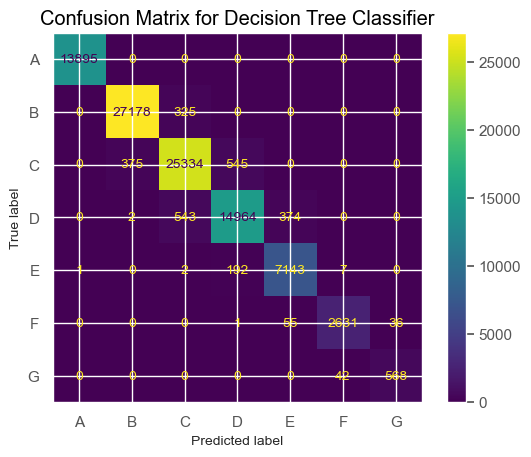

In [57]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import os

# Compute confusion matrix
cm = confusion_matrix(y_test, clf.predict(x_test), labels=clf.classes_)

# Define title and color
title = "Confusion Matrix for Decision Tree Classifier"
color = 'black'

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.title(title, color=color)  # Add title with specified color

# Define the directory to save the figure
save_dir = "../../credit-risk-classifier/reports/figures"

# Save the figure
plt.savefig(os.path.join(save_dir, 'ConfusionMatrixforDecisionTreeClassifier.png'), transparent=False)
plt.show()

In [58]:
from sklearn.metrics import classification_report

print(classification_report(y_test, clf.predict(x_test)))

              precision    recall  f1-score   support

           A       1.00      1.00      1.00     13895
           B       0.99      0.99      0.99     27503
           C       0.97      0.96      0.97     26254
           D       0.95      0.94      0.95     15883
           E       0.94      0.97      0.96      7345
           F       0.98      0.97      0.97      2723
           G       0.94      0.93      0.94       610

    accuracy                           0.97     94213
   macro avg       0.97      0.97      0.97     94213
weighted avg       0.97      0.97      0.97     94213



In [59]:
# Print test accuracy
test_accuracy = metrics.accuracy_score(y_test, clf.predict(x_test))
print("Test Accuracy:", test_accuracy)

# Cross-validation accuracy
cv_scores = cross_val_score(clf, x_train, y_train, cv=10)  # 10-fold cross-validation
print("Cross-validation Accuracy Scores:", cv_scores)

# Mean cross-validation accuracy
mean_cv_accuracy = np.mean(cv_scores)
print("Mean Cross-validation Accuracy:", mean_cv_accuracy)

# Standard deviation of cross-validation accuracy
std_cv_accuracy = np.std(cv_scores)
print("Standard Deviation of Cross-validation Accuracy:", std_cv_accuracy)

# Training accuracy
train_accuracy = clf.score(x_train, y_train)
print("Training Accuracy:", train_accuracy)

decisionTreeScore = test_accuracy

Test Accuracy: 0.9734643838960653
Cross-validation Accuracy Scores: [0.98079328 0.97933454 0.98065435 0.97485413 0.97648652 0.97690331
 0.97666018 0.97790976 0.97641624 0.96568372]
Mean Cross-validation Accuracy: 0.9765696027011851
Standard Deviation of Cross-validation Accuracy: 0.004068915473681694
Training Accuracy: 1.0


In [60]:
# Learning curve
train_sizes, train_scores, test_scores = learning_curve(clf, x_train, y_train, cv=10)

# Mean training and test scores
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

# Standard deviation of training and test scores
train_std = np.std(train_scores, axis=1)
test_std = np.std(test_scores, axis=1)

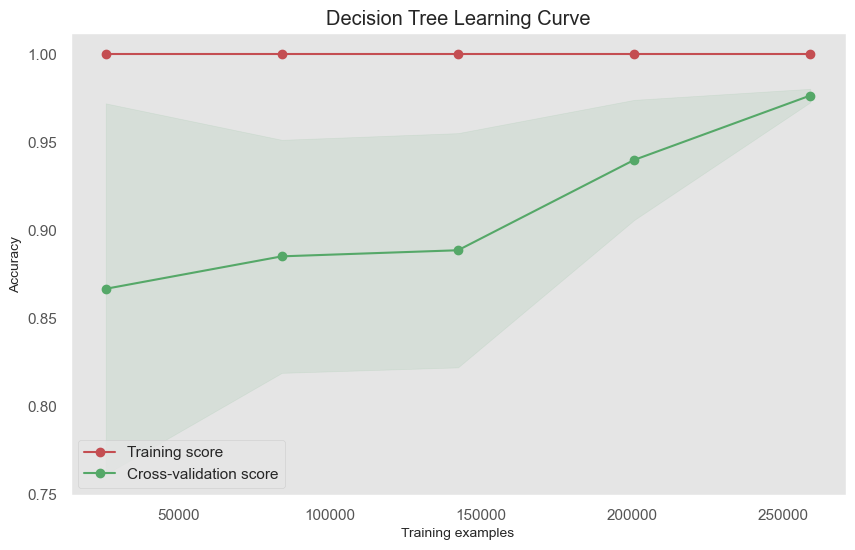

In [61]:
# Plot learning curve
plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Accuracy")
plt.title("Decision Tree Learning Curve")
plt.legend(loc="best")
plt.grid()

# Define the directory to save the figure
save_dir = "../../credit-risk-classifier/reports/figures"

# Save the figure
plt.savefig(os.path.join(save_dir, 'DecisionTreeLearningCurve.png'), transparent=False)

plt.show()

## Save Model for Deployment

In [73]:
import os
import pickle

# Absolute path to the models directory
save_dir = "../../credit-risk-classifier/src/models"

# File path
filename = os.path.join(save_dir, "decision_tree_model.pkl")

# Save the trained model
with open(filename, 'wb') as file:
    pickle.dump(clf, file)